# Corpus overview

Nothing fancy, just some basic info about the class corpus of novels.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from   glob import glob

sns.set(context='talk') # Initialize seaborn

text_dir = os.path.join('..', 'data', 'texts')
file_paths = glob(os.path.join(text_dir, '*.txt'))
file_names = [os.path.split(i)[1].rstrip('.txt') for i in file_paths]

nation  = [i.split('-')[0] for i in file_names]
author  = [i.split('-')[1] for i in file_names]
title   = [i.split('-')[2] for i in file_names]
pubdate = [i.split('-')[3] for i in file_names]
gender  = [i.split('-')[4] for i in file_names]

metadata = pd.DataFrame.from_records(
    {
        'nation':nation,
        'gender':gender,
        'year':pubdate,
        'author':author,
        'title':title
    },
    columns = ['nation', 'gender', 'year', 'author', 'title']
)
metadata.year = metadata.year.astype(int)
metadata.sort_values('author')

,nation,gender,year,author,title
0,A,F,1868,Alcott,Little_Women
19,B,F,1813,Austen,Pride_Prejudice
20,B,F,1847,Bronte_C,Jane_Eyre
21,B,F,1847,Bronte_E,Wuthering_Heights
22,B,F,1778,Burney,Evelina
1,A,F,1918,Cather,Antonia
2,A,M,1901,Chesnutt,Marrow
3,A,F,1899,Chopin,Awakening
23,B,M,1902,Conrad,Heart_Darkness
4,A,M,1893,Crane,Maggie


In [2]:
# Composition by nation and gender
metadata.groupby('nation').gender.value_counts()

nation  gender
A       F         10
        M         10
B       F         10
        M         10
Name: gender, dtype: int64

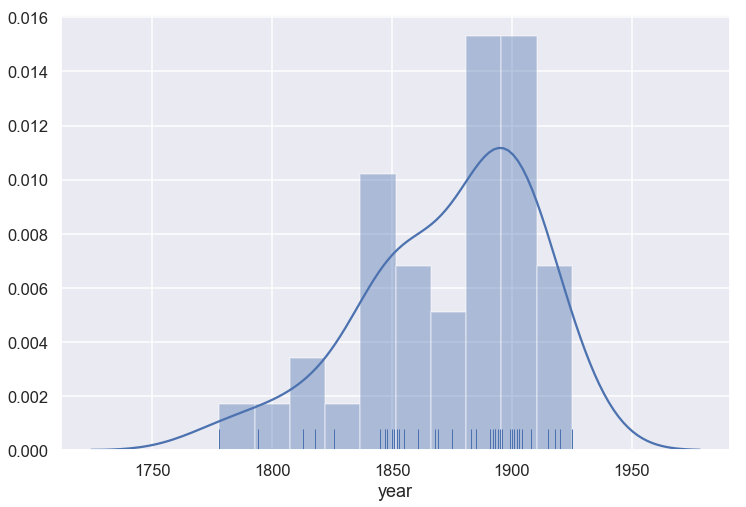

In [5]:
# Plot overall distribution by pub date
import warnings
warnings.simplefilter('ignore')
sns.set()
sns.set_context('talk')
plt.rcParams['figure.figsize'] = [12, 8]

sns.distplot(metadata['year'], rug=True, kde=True, bins=10);

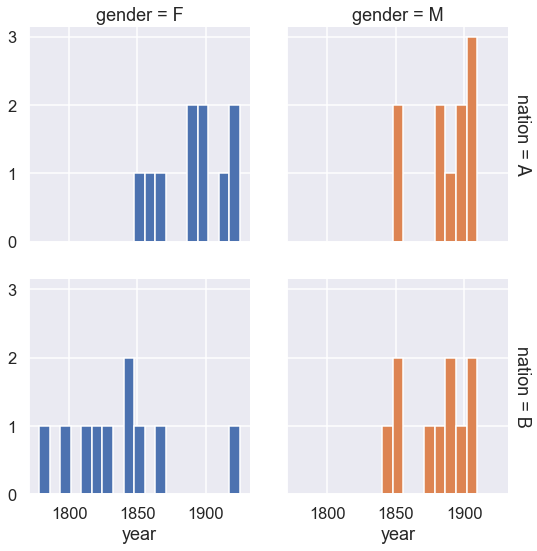

In [7]:
# Plot distributions by nation and gender

g = sns.FacetGrid(
    metadata, 
    row='nation', 
    col='gender', 
    hue='gender', 
    margin_titles=True,
    height=4
)
bins = np.linspace(metadata.year.min(), metadata.year.max(), 20)
g.map(plt.hist, 'year', bins=bins);

Notice that male authors are similarly distributed in time, but female British authors in the corpus skew earlier than female American authors. The difference in mean publication date between the two nations is driven by this difference between the female authors.